In [4]:
import pandas as pd
import numpy as np
import random

# Define the categories and product types
categories = ['MALE', 'WOMEN', 'CHILDREN']
product_types = ['T-shirt', 'Jeans', 'Shirt', 'Dress', 'Jacket', 'Sweater', 'Skirt', 'Shorts']
sizes = ['S', 'M', 'L', 'XL']
price_range = (10, 100)  # Price between 10 and 100 USD

# Generate random data
num_rows = 300
data = []

for i in range(num_rows):
    item_id = f'ITEM_{i+1}'
    category = random.choice(categories)
    product_type = random.choice(product_types)
    price = round(random.uniform(price_range[0], price_range[1]), 2)
    size = random.choice(sizes)
    data.append([item_id, category, product_type, price, size])

# Create DataFrame
df = pd.DataFrame(data, columns=['Item_ID', 'Category', 'Product_Type', 'Price', 'Size'])

# Save to a CSV file (optional)
df.to_csv('fashion_dataset.csv', index=False)

# Display the first few rows
print(df.head())


  Item_ID  Category Product_Type  Price Size
0  ITEM_1     WOMEN        Jeans  37.83    L
1  ITEM_2      MALE       Jacket  18.68    M
2  ITEM_3      MALE        Jeans  19.98    S
3  ITEM_4  CHILDREN        Skirt  87.88    M
4  ITEM_5      MALE        Shirt  44.07    S


In [7]:
import pandas as pd

# Step 1: Extract - Load data from CSV (or directly from the generated DataFrame)
df = pd.read_csv('fashion_dataset.csv')

# Step 2: Transform - Data Cleaning & Transformation

# Check for any missing values
print(f"Missing values: {df.isnull().sum()}")

# Remove rows with missing values (if any)
df.dropna(inplace=True)

# Step 3: Additional transformations - for instance, convert 'Price' to categorical ranges
bins = [0, 20, 50, 80, 100]
labels = ['0-20', '21-50', '51-80', '81-100']
df['Price_Range'] = pd.cut(df['Price'], bins=bins, labels=labels)

# Display the transformed DataFrame
print(df.head())


Missing values: Item_ID         0
Category        0
Product_Type    0
Price           0
Size            0
dtype: int64
  Item_ID  Category Product_Type  Price Size Price_Range
0  ITEM_1     WOMEN        Jeans  37.83    L       21-50
1  ITEM_2      MALE       Jacket  18.68    M        0-20
2  ITEM_3      MALE        Jeans  19.98    S        0-20
3  ITEM_4  CHILDREN        Skirt  87.88    M      81-100
4  ITEM_5      MALE        Shirt  44.07    S       21-50


<ipython-input-8-8b02c54e8c15>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Price', palette="Set2")


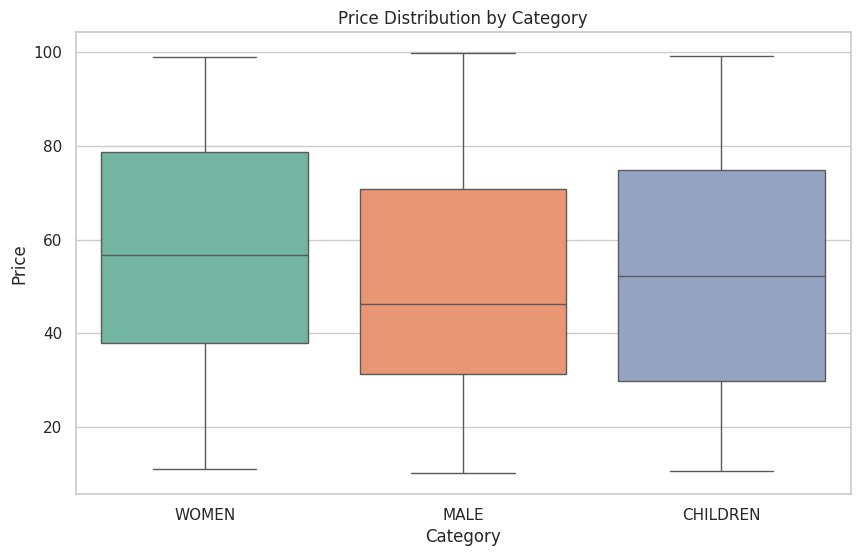

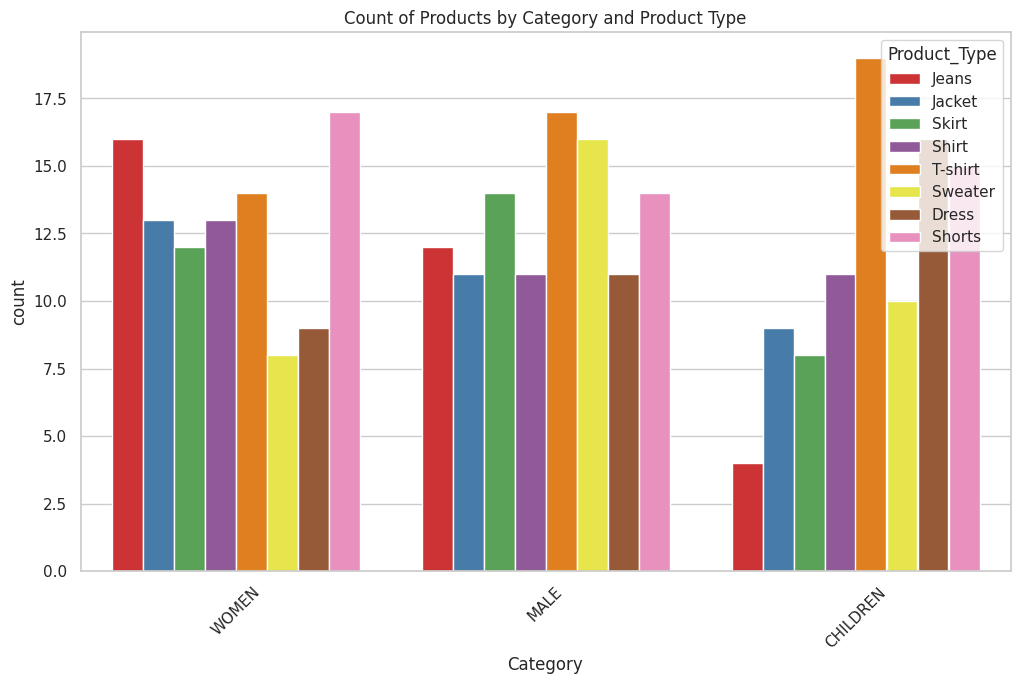

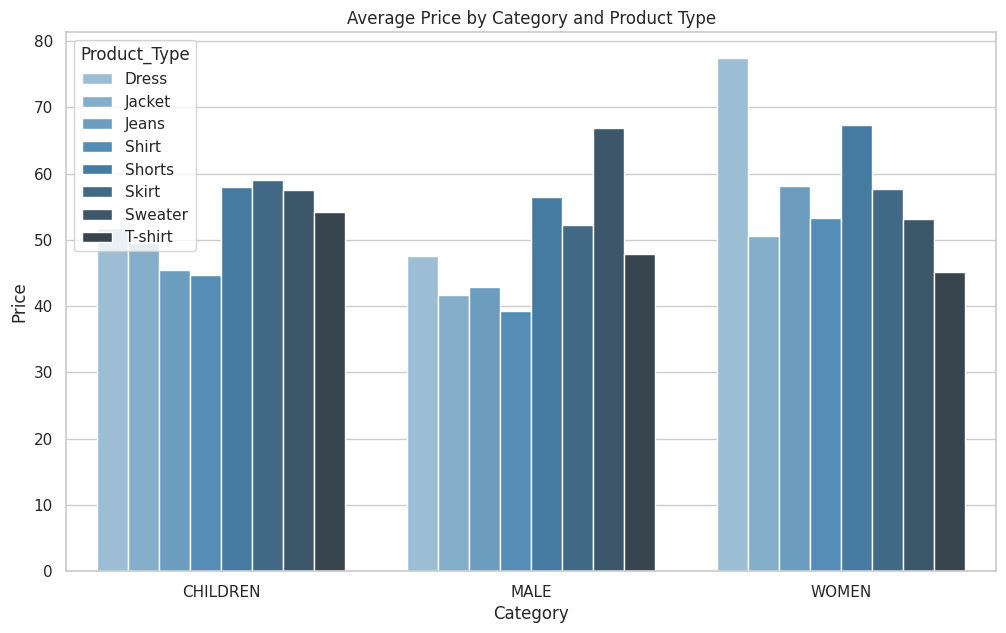

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# 1. Distribution of prices by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Price', palette="Set2")
plt.title("Price Distribution by Category")
plt.show()

# 2. Count of products by category and product type
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Category', hue='Product_Type', palette="Set1")
plt.title("Count of Products by Category and Product Type")
plt.xticks(rotation=45)
plt.show()

# 3. Average price by category and product type
avg_price = df.groupby(['Category', 'Product_Type'])['Price'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=avg_price, x='Category', y='Price', hue='Product_Type', palette="Blues_d")
plt.title("Average Price by Category and Product Type")
plt.show()
